In [2]:
# Load data
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0
✔ recipes      1.0.6     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
electricity <- read_csv("electricity2.csv")

Rows: 228 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Building_Name, Month
dbl (2): Usage, co2_emissions

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
electricity$Building_Name<-as.factor(electricity$Building_Name)
electricity$Month<-as.factor(electricity$Month)
electricity$Usage<-as.numeric(electricity$Usage)
electricity$co2_emissions<-as.numeric(electricity$co2_emissions)

In [5]:
electricity

Building_Name                     Month     Usage co2_emissions
1   Aquatic Center                    July      48701 18077.8112   
2   Aquatic Center                    august    47788 17738.9056   
3   Aquatic Center                    september 77565 28792.1280   
4   Aquatic Center                    october   64486 23937.2032   
5   Aquatic Center                    november  73772 27384.1664   
6   Aquatic Center                    december  66388 24643.2256   
7   Aquatic Center                    january   68008 25244.5696   
8   Aquatic Center                    febuary   70485 26164.0320   
9   Aquatic Center                    march     78804 29252.0448   
10  Aquatic Center                    april     74949 27821.0688   
11  Aquatic Center                    may       67591 25089.7792   
12  Aquatic Center                    June      68296 25351.4752   
13  Baker House                       July       3213  1192.6656   
14  Baker House                       august     2966  1100.9792   
15  Baker House                       september  2919  1083.5328   
16  Baker House                       october    1975   733.1200   
17  Baker House                       november   1921   713.0752   
18  Baker House                       december   2086   774.3232   
19  Baker House                       january    2040   757.2480   
20  Baker House                       febuary    2529   938.7648   
21  Baker House                       march      1825   677.4400   
22  Baker House                       april      1788   663.7056   
23  Baker House                       may        1683   624.7296   
24  Baker House                       June       2468   916.1216   
25  Child Development Center          July       9914  3680.0768   
26  Child Development Center          august    11488  4264.3456   
27  Child Development Center          september 10540  3912.4480   
28  Child Development Center          october    8002  2970.3424   
29  Child Development Center          november  10119  3756.1728   
30  Child Development Center          december  15759  5849.7408   
⋮   ⋮                                 ⋮         ⋮     ⋮            
199 The Hub                           january   55604 20640.205    
200 The Hub                           febuary   63328 23507.354    
201 The Hub                           march     64763 24040.026    
202 The Hub                           april     61748 22920.858    
203 The Hub                           may       69342 25739.750    
204 The Hub                           June      63251 23478.771    
205 West Campus Parking  ELEC         July       2700  1002.240    
206 West Campus Parking  ELEC         august     2740  1017.088    
207 West Campus Parking  ELEC         september  3460  1284.352    
208 West Campus Parking  ELEC         october    3360  1247.232    
209 West Campus Parking  ELEC         november   3800  1410.560    
210 West Campus Parking  ELEC         december   4940  1833.728    
211 West Campus Parking  ELEC         january    4040  1499.648    
212 West Campus Parking  ELEC         febuary    3820  1417.984    
213 West Campus Parking  ELEC         march      3660  1358.592    
214 West Campus Parking  ELEC         april      3160  1172.992    
215 West Campus Parking  ELEC         may        2820  1046.784    
216 West Campus Parking  ELEC         June       2760  1024.512    
217 West Campus Maintenance Bldg ELEC July        340   126.208    
218 West Campus Maintenance Bldg ELEC august      320   118.784    
219 West Campus Maintenance Bldg ELEC september   400   148.480    
220 West Campus Maintenance Bldg ELEC october     360   133.632    
221 West Campus Maintenance Bldg ELEC november   1860   690.432    
222 West Campus Maintenance Bldg ELEC december   2200   816.640    
223 West Campus Maintenance Bldg ELEC january    2600   965.120    
224 West Campus Maintenance Bldg ELEC febuary    3700  1373.440    
225 West Campus Maintenance Bldg ELEC march      3300  1224.

In [6]:
scope2 <- read_csv("scope2.csv")

Rows: 1420 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Building_Name, Date, Month, Pounds/Usable
dbl (1): co2_emissions
num (2): Usable_Area, Use

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
scope2 %>%
group_by (Building_Name) %>%
summarise(avg_emissions=mean(co2_emissions)) %>%
arrange(desc(avg_emissions)) %>%
top_n(n = 5)

Selecting by avg_emissions


Building_Name       avg_emissions
1 Johnson Center      357160.1     
2 Aquia               314152.7     
3 Mason Global Center 208406.8     
4 Engineering         166943.0     
5 CHCP MCC 10 DEM     166654.6

Selecting by avg_emissions
Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


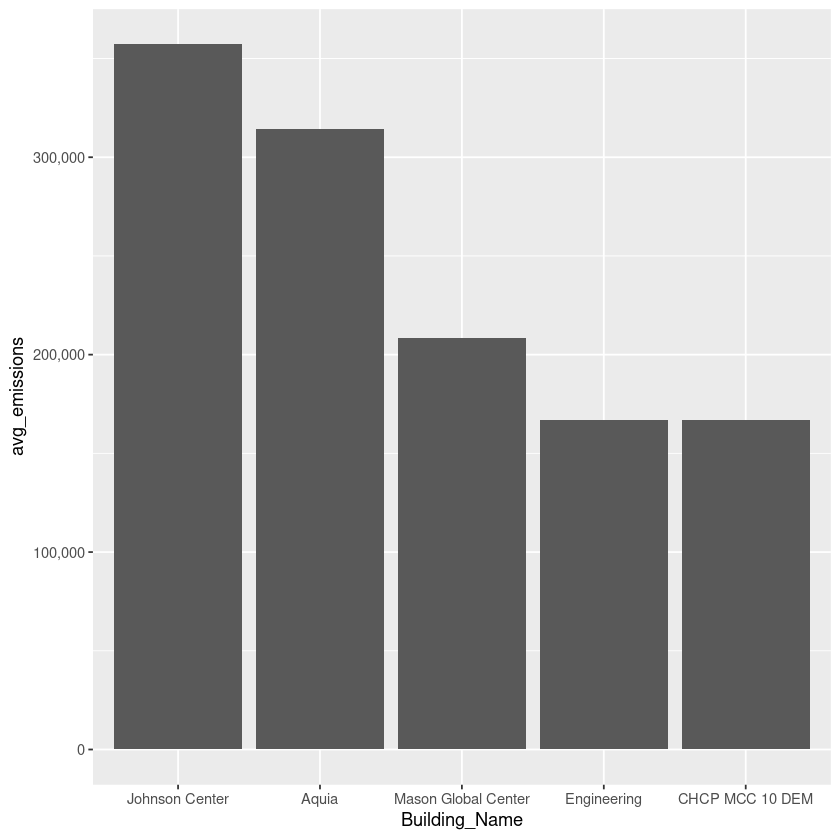

In [8]:
elec<-scope2 %>%
group_by (Building_Name) %>%
summarise(avg_emissions=mean(co2_emissions)) %>%
arrange(desc(avg_emissions)) %>%
top_n(n = 5)

ggplot (elec, aes(x=reorder(Building_Name, -avg_emissions),y=avg_emissions))+geom_histogram(stat="identity")+scale_y_continuous(labels = comma)+ xlab("Building_Name")

In [9]:
electricity %>%
group_by (Month) %>%
summarise(avg_emissions=mean(co2_emissions)) %>%
arrange(desc(avg_emissions))


Month     avg_emissions
1  november  35376.26     
2  september 35108.29     
3  march     33402.71     
4  febuary   32342.91     
5  april     31169.47     
6  october   30261.47     
7  June      29628.56     
8  may       29203.75     
9  July      28808.11     
10 december  28566.34     
11 august    28364.10     
12 january   28223.23

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


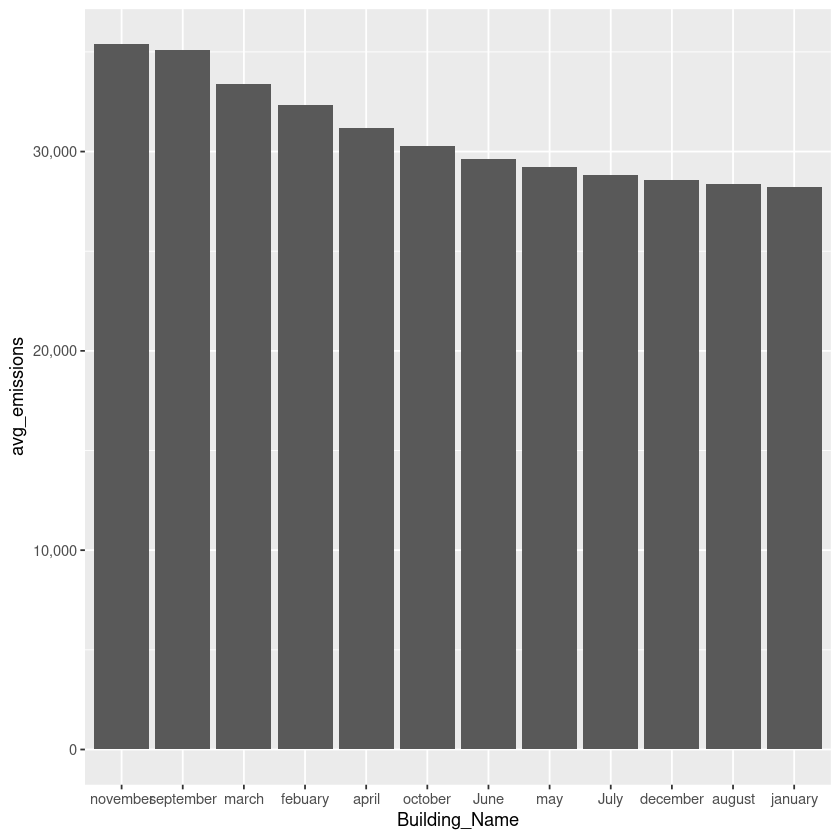

In [10]:
elec<-electricity %>%
group_by (Month) %>%
summarise(avg_emissions=mean(co2_emissions)) %>%
arrange(desc(avg_emissions))

ggplot (elec, aes(x=reorder(Month, -avg_emissions),y=avg_emissions))+geom_histogram(stat="identity")+scale_y_continuous(labels = comma)+ xlab("Building_Name")

In [11]:
commute <- read_csv("commuters.csv")

Rows: 36 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Date, Month, Commuter_category
dbl (4): average_commuters, total_miles, fuel_utilized, co2_emitted

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
commute

Date                  Month     Commuter_category average_commuters
1  6/26/2020- 7/28/2020  July      Faculty Commuting   400            
2  7/28/2020- 8/26/2020  august    Faculty Commuting   800            
3  8/26/2020- 9/28/2020  september Faculty Commuting  2000            
4  9/28/2020-10/27/2020  october   Faculty Commuting  2000            
5  10/27/2020-11/30/2020 november  Faculty Commuting  2000            
6  11/30/2020-12/30/2020 december  Faculty Commuting   800            
7  12/30/2020-1/28/2021  january   Faculty Commuting   800            
8  1/28/2021-2/26/2021   febuary   Faculty Commuting  2000            
9  2/26/2021-3/29/2021   march     Faculty Commuting  2000            
10 3/29/2021-4/28/2021   april     Faculty Commuting  2000            
11 4/28/2021-4/28/2021   may       Faculty Commuting   800            
12 5/28/2021-6/28/2021   June      Faculty Commuting   400            
13 6/26/2020- 7/28/2020  July      Staff Commuting    1000            
14 7/28/2020- 8/26/2020  august    Staff Commuting    1500            
15 8/26/2020- 9/28/2020  september Staff Commuting    2500            
16 9/28/2020-10/27/2020  october   Staff Commuting    2500            
17 10/27/2020-11/30/2020 november  Staff Commuting    2500            
18 11/30/2020-12/30/2020 december  Staff Commuting    1500            
19 12/30/2020-1/28/2021  january   Staff Commuting    1500            
20 1/28/2021-2/26/2021   febuary   Staff Commuting    2500            
21 2/26/2021-3/29/2021   march     Staff Commuting    2500            
22 3/29/2021-4/28/2021   april     Staff Commuting    2500            
23 4/28/2021-4/28/2021   may       Staff Commuting    1500            
24 5/28/2021-6/28/2021   June      Staff Commuting    1000            
25 6/26/2020- 7/28/2020  July      Student Commuting  2000            
26 7/28/2020- 8/26/2020  august    Student Commuting 10000            
27 8/26/2020- 9/28/2020  september Student Commuting 15000            
28 9/28/2020-10/27/2020  october   Student Commuting 15000            
29 10/27/2020-11/30/2020 november  Student Commuting 15000            
30 11/30/2020-12/30/2020 december  Student Commuting 10000            
31 12/30/2020-1/28/2021  january   Student Commuting 10000            
32 1/28/2021-2/26/2021   febuary   Student Commuting 15000            
33 2/26/2021-3/29/2021   march     Student Commuting 15000            
34 3/29/2021-4/28/2021   april     Student Commuting 15000            
35 4/28/2021-4/28/2021   may       Student Commuting 10000            
36 5/28/2021-6/28/2021   June      Student Commuting  2000            
   total_miles fuel_utilized co2_emitted
1    40000      2000           7985.481 
2    80000      4000          15970.962 
3   200000     10000          39927.405 
4   200000     10000          39927.405 
5   200000     10000          39927.405 
6    80000      4000          15970.962 
7    80000      4000          15970.962 
8   200000     10000          39927.405 
9   200000     10000          39927.405 
10  200000     10000          39927.405 
11   80000      4000          15970.962 
12   40000      2000           7985.481 
13  100000      5000          19963.702 
14  150000      7500          29945.554 
15  250000     12500          49909.256 
16  250000     12500          49909.256 
17  250000     12500          49909.256 
18  150000      7500          29945.554 
19  150000      7500          29945.554 
20  250000     12500          49909.256 
21  250000     12500          49909.256 
22  250000     12500          49909.256 
23  150000      7500          29945.554 
24  100000      5000          19963.702 
25  200000     10000          39927.405 
26 1000000     50000         199637.024 
27 1500000     75000         299455.535 
28 1500000     75000         299455.535 
29 1500000     75000         299455.535 
30 1000000     50000         199637.024 
31 1000000     50000         199637.024 
32 1500000     75000         299455.535 
33 1500000     75000   

In [13]:
commute %>%
group_by (Commuter_category) %>%
summarise(avg_emissions=mean(co2_emitted)) %>%
arrange(desc(avg_emissions)) %>%
top_n(n = 5)

Selecting by avg_emissions


Commuter_category avg_emissions
1 Student Commuting 222928.01    
2 Staff Commuting    38263.76    
3 Faculty Commuting  26618.27

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


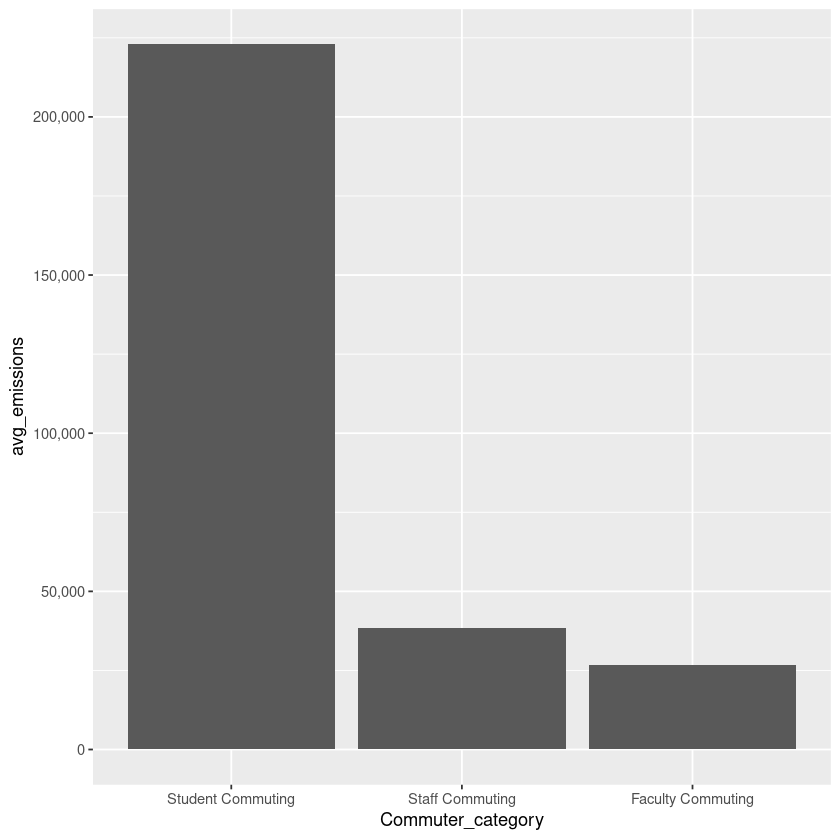

In [14]:
comm<-commute %>%
group_by (Commuter_category) %>%
summarise(avg_emissions=mean(co2_emitted)) %>%
arrange(desc(avg_emissions))

ggplot (comm, aes(x=reorder(Commuter_category, -avg_emissions),y=avg_emissions))+geom_histogram(stat="identity")+scale_y_continuous(labels = comma)+ xlab("Commuter_category")

In [15]:
fuel<- read_csv("fuel.csv")

Rows: 48 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): 2022 Month, Fleet
dbl (3): Gallons, kgs_co2_emissions, pounds_co2_emissions

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
fuel %>%
group_by (Fleet) %>%
summarise(avg_emissions=mean(pounds_co2_emissions)) %>%
arrange(desc(avg_emissions)) 

Fleet          avg_emissions
1 Gasoline Fleet 934232.845   
2 Diesel Fleet   641928.690   
3 CNG Fleet        6965.725   
4 E85 Fleet        6498.505

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


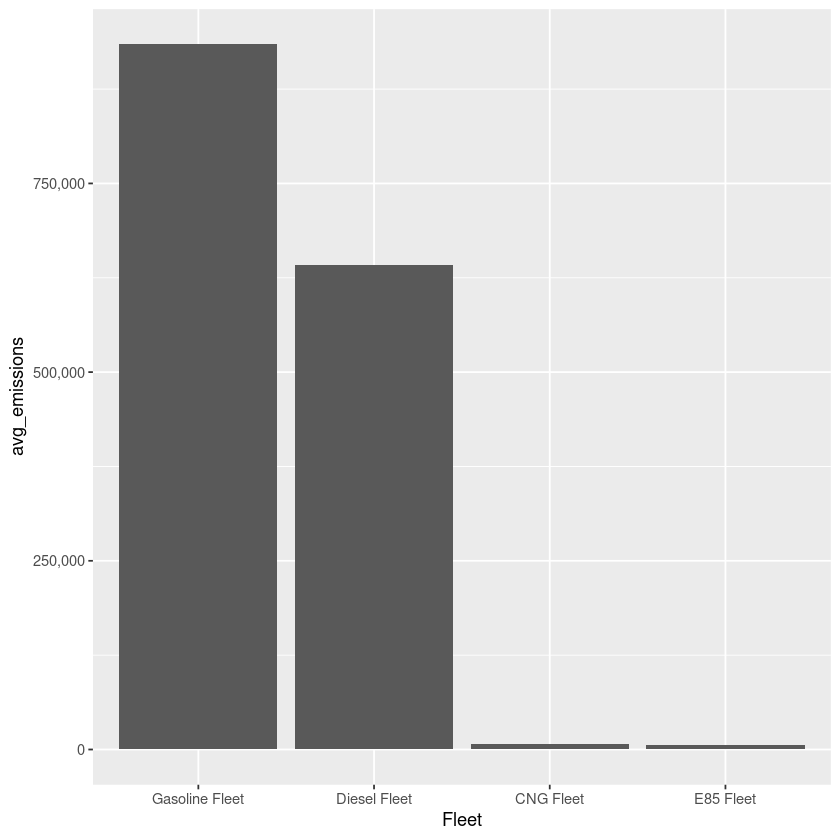

In [17]:
f<-fuel %>%
group_by (Fleet) %>%
summarise(avg_emissions=mean(pounds_co2_emissions)) %>%
arrange(desc(avg_emissions))  

ggplot (f, aes(x=reorder(Fleet, -avg_emissions),y=avg_emissions))+geom_histogram(stat="identity")+scale_y_continuous(labels = comma)+ xlab("Fleet")

In [18]:
fertilizer <- read_csv("fertilizer.csv")
fertilizer

New names:
• `` -> `...6`
Rows: 9 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Fertilizer, Month_of_application
dbl (3): Amount_in_pounds, Amount_in_tons, co2_emissions_pounds
lgl (1): ...6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Fertilizer Month_of_application Amount_in_pounds Amount_in_tons
1 17-0-5     March(2022)            38.9           0.017505      
2 17-0-5     June(2022)             40.9           0.018405      
3 28-0-3     November(2021)       2000.0           0.900000      
4 15-0-5     April(2022)          3050.0           1.372500      
5 19-0-19    July(2021)           3900.0           1.755000      
6 19-0-19    August(2021)         3900.0           1.755000      
7 19-0-19    April(2022)           450.0           0.202500      
8 19-0-19    May(2022)             500.0           0.225000      
9 19-0-19    June(2022)           2950.0           1.327500      
  co2_emissions_pounds ...6
1   3072.24            NA  
2   3230.20            NA  
3 260162.80            NA  
4 212543.71            NA  
5 344251.13            NA  
6 344251.13            NA  
7  39721.28            NA  
8  44134.76            NA  
9 260395.09            NA

In [19]:
fertilizer %>%
group_by (Fertilizer) %>%
summarise(avg_emissions=mean(co2_emissions_pounds)) %>%
arrange(desc(avg_emissions)) 

Fertilizer avg_emissions
1 28-0-3     260162.80    
2 15-0-5     212543.71    
3 19-0-19    206550.68    
4 17-0-5       3151.22

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


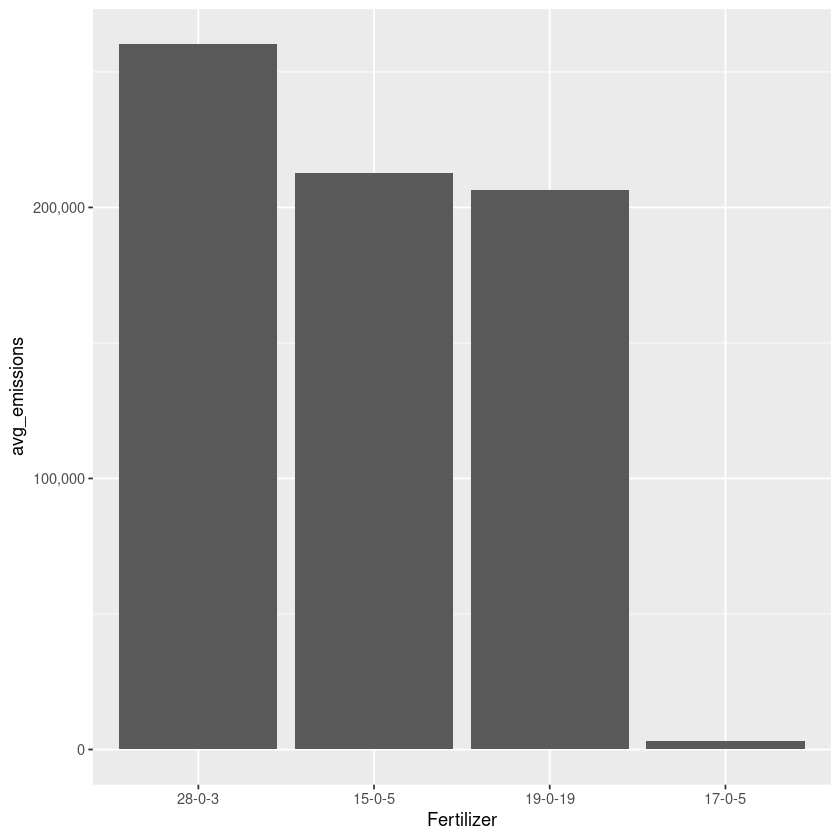

In [20]:
fert<-fertilizer %>%
group_by (Fertilizer) %>%
summarise(avg_emissions=mean(co2_emissions_pounds)) %>%
arrange(desc(avg_emissions))   

ggplot (fert, aes(x=reorder(Fertilizer, -avg_emissions),y=avg_emissions))+geom_histogram(stat="identity")+scale_y_continuous(labels = comma)+ xlab("Fertilizer")

In [21]:
naturalgas <- read_csv("naturalgas.csv")
naturalgas

Rows: 276 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Building_Name, Month
dbl (3): Usable_Area, co2_emissions, pounds of co2 emitted/usable area
num (1): Usage_therms

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Building_Name       Usable_Area Month     Usage_therms co2_emissions
1   Aquatic Center       81576      July         0             0        
2   Aquatic Center       81576      august       0             0        
3   Aquatic Center       81576      september    0             0        
4   Aquatic Center       81576      october    660          7920        
5   Aquatic Center       81576      november   540          6480        
6   Aquatic Center       81576      december     0             0        
7   Aquatic Center       81576      january      0             0        
8   Aquatic Center       81576      febuary      0             0        
9   Aquatic Center       81576      march        0             0        
10  Aquatic Center       81576      april        0             0        
11  Aquatic Center       81576      may          0             0        
12  Aquatic Center       81576      June       110          1320        
13  Baker House             NA      July        30           360        
14  Baker House             NA      august       0             0        
15  Baker House             NA      september   10           120        
16  Baker House             NA      october     40           480        
17  Baker House             NA      november   150          1800        
18  Baker House             NA      december   190          2280        
19  Baker House             NA      january    170          2040        
20  Baker House             NA      febuary    170          2040        
21  Baker House             NA      march      100          1200        
22  Baker House             NA      april       70           840        
23  Baker House             NA      may          0             0        
24  Baker House             NA      June        50           600        
25  Field House         122991      July      1240         14880        
26  Field House         122991      august    1510         18120        
27  Field House         122991      september 1490         17880        
28  Field House         122991      october   3760         45120        
29  Field House         122991      november  5800         69600        
30  Field House         122991      december  7900         94800        
⋮   ⋮                   ⋮           ⋮         ⋮            ⋮            
247 CHCP                NA          january   44331.0      5671258.3    
248 CHCP                NA          febuary   39160.0      5009733.1    
249 CHCP                NA          march     29996.0      3837383.9    
250 CHCP                NA          april     23035.0      2946864.2    
251 CHCP                NA          may       18389.0      2352502.1    
252 CHCP                NA          June      13269.0      1697501.2    
253 Manhattan Pizza GAS NA          July          0.0            0.0    
254 Manhattan Pizza GAS NA          august      370.0         4440.0    
255 Manhattan Pizza GAS NA          september  3136.7        37640.4    
256 Manhattan Pizza GAS NA          october     730.0         8760.0    
257 Manhattan Pizza GAS NA          november    520.0         6240.0    
258 Manhattan Pizza GAS NA          december    215.0         2580.0    
259 Manhattan Pizza GAS NA          january      60.0          720.0    
260 Manhattan Pizza GAS NA          febuary     380.0         4560.0    
261 Manhattan Pizza GAS NA          march       385.0         4620.0    
262 Manhattan Pizza GAS NA          april       385.0         4620.0    
263 Manhattan Pizza GAS NA          may         355.0         4260.0    
264 Manhattan Pizza GAS NA          June          0.0            0.0    
265 Panda Express GAS   NA          July          0.0            0.0    
266 Panda Express GAS   NA          august      370.0         4440.0    
267 Panda Express GAS   NA          september  3136.7        37640.4    
268 Panda Express GAS   NA          october     730.0         8760.0    
269 Panda Express GAS   NA          november    520.0         

In [22]:
naturalgas %>%
group_by (Building_Name) %>%
summarise(avg_emissions=mean(co2_emissions)) %>%
arrange(desc(avg_emissions)) 

Building_Name                       avg_emissions
1  CHCP                                3349789.9    
2  Mason Global Center                   97530.0    
3  RAC GAS                               92610.0    
4  Thompson Hall GAS                     80150.0    
5  Field House                           46630.0    
6  Fenwick Library GAS                   19070.0    
7  Johnson Center                        14230.0    
8  Southside Dining                      10800.0    
9  Manhattan Pizza GAS                    6536.7    
10 Panda Express GAS                      6536.7    
11 Facilities Management GAS              5970.0    
12 Mathy House GAS                        3000.0    
13 Roberts House GAS                      1860.0    
14 Greenhouse                             1760.0    
15 Tallwood Annex GAS                     1760.0    
16 Aquatic Center                         1310.0    
17 Peterson Family Health Building-GAS    1240.0    
18 Mason Club                             1100.0    
19 Baker House                             980.0    
20 Carty House GAS                         730.0    
21 Tallwood Cottage GAS                    640.0    
22 Northern Neck                           180.0    
23 Krasnow Institute GAS                     0.0

Selecting by avg_emissions
Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


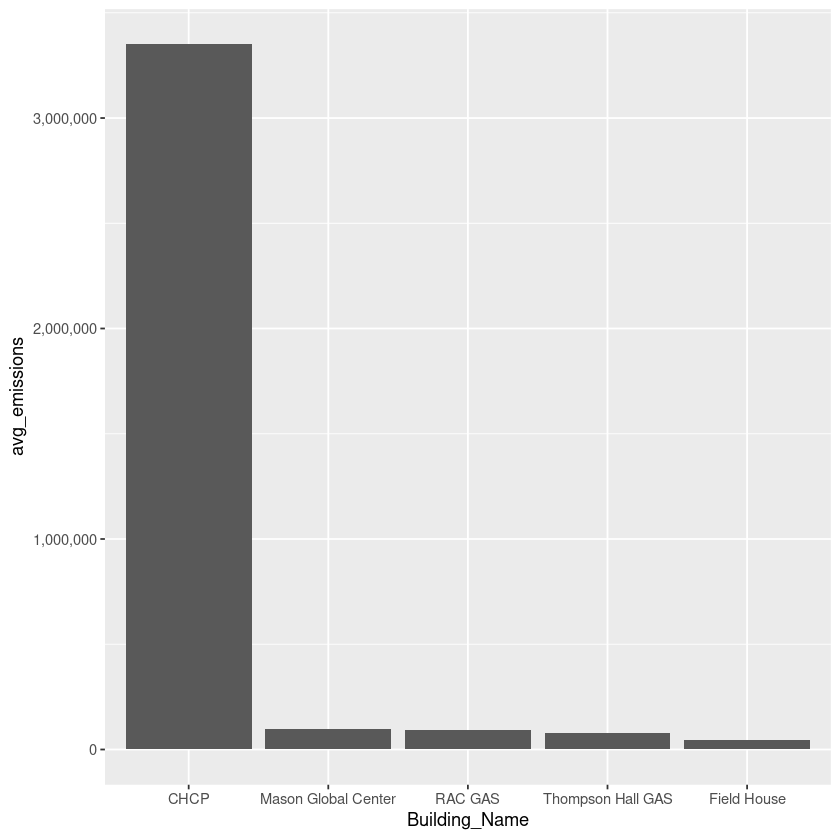

In [23]:
gas<-naturalgas %>%
group_by (Building_Name) %>%
summarise(avg_emissions=mean(co2_emissions)) %>%
arrange(desc(avg_emissions)) %>% 
top_n(n = 5)

ggplot (gas, aes(x=reorder(Building_Name, -avg_emissions),y=avg_emissions))+geom_histogram(stat="identity")+scale_y_continuous(labels = comma)+ xlab("Building_Name")

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


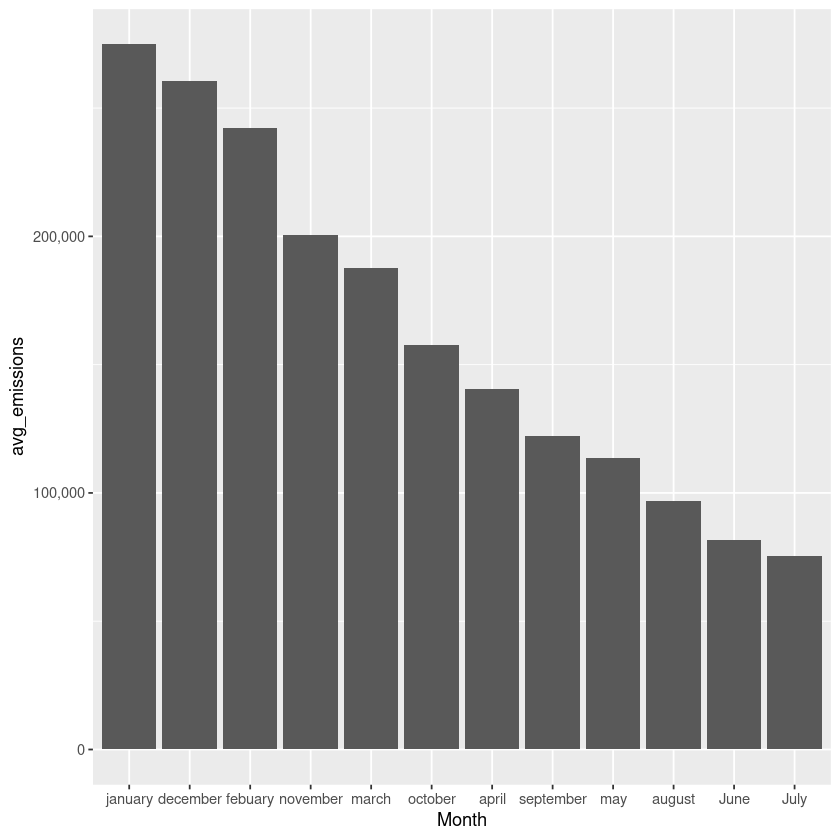

In [24]:
gas<-naturalgas %>%
group_by (Month) %>%
summarise(avg_emissions=mean(co2_emissions)) %>%
arrange(desc(avg_emissions)) 

ggplot (gas, aes(x=reorder(Month, -avg_emissions),y=avg_emissions))+geom_histogram(stat="identity")+scale_y_continuous(labels = comma)+ xlab("Month")

In [25]:
library(class)


# Split the dataset into training and testing sets
set.seed(123)  # For reproducibility
sample_indices <- sample(1:nrow(commute), size = 0.7 * nrow(commute)) 

In [26]:
# Create training and testing datasets
commute$co2_emitted <- scale(commute$co2_emitted)
commute$co2_emitted <- round(commute$co2_emitted, digits = 1)
commute$fuel_utilized <- scale(commute$fuel_utilized)
commute$fuel_utilized <- round(commute$fuel_utilized, digits = 1)
commute$average_commuters <- scale(commute$average_commuters )
commute$average_commuters  <- round(commute$average_commuters , digits = 1)
commute$total_miles <- scale(commute$total_miles)
commute$total_miles   <- round(commute$total_miles , digits = 1)

commute_train <- commute[sample_indices, ]
commute_test <- commute[-sample_indices, ]
commute_test

Date                  Month     Commuter_category average_commuters
1  7/28/2020- 8/26/2020  august    Faculty Commuting -0.7             
2  11/30/2020-12/30/2020 december  Faculty Commuting -0.7             
3  5/28/2021-6/28/2021   June      Faculty Commuting -0.8             
4  6/26/2020- 7/28/2020  July      Staff Commuting   -0.7             
5  9/28/2020-10/27/2020  october   Staff Commuting   -0.4             
6  10/27/2020-11/30/2020 november  Staff Commuting   -0.4             
7  4/28/2021-4/28/2021   may       Staff Commuting   -0.6             
8  5/28/2021-6/28/2021   June      Staff Commuting   -0.7             
9  8/26/2020- 9/28/2020  september Student Commuting  1.9             
10 4/28/2021-4/28/2021   may       Student Commuting  1.0             
11 5/28/2021-6/28/2021   June      Student Commuting -0.5             
   total_miles fuel_utilized co2_emitted
1  -0.7        -0.7          -0.7       
2  -0.7        -0.7          -0.7       
3  -0.8        -0.8          -0.8       
4  -0.7        -0.7          -0.7       
5  -0.4        -0.4          -0.4       
6  -0.4        -0.4          -0.4       
7  -0.6        -0.6          -0.6       
8  -0.7        -0.7          -0.7       
9   1.9         1.9           1.9       
10  1.0         1.0           1.0       
11 -0.5        -0.5          -0.5

In [27]:
library(class)


# Split the dataset into training and testing sets
set.seed(123)  # For reproducibility
sample_indices <- sample(1:nrow(electricity), size = 0.7 * nrow(electricity)) 

In [49]:
# Create training and testing datasets
electricity$Building_Name <- as.numeric(electricity$Building_Name)
electricity$Month <- as.numeric(electricity$Month)
electricity$co2_emissions <- scale(electricity$co2_emissions)
electricity$co2_emissions <- round(electricity$co2_emissions, digits = 1)
electricity$Usage <- scale(electricity$Usage)
electricity$Usage <- round(electricity$Usage, digits = 1)
electricity$Building_Name <- scale(electricity$Building_Name)
electricity$Building_Name <- round(electricity$Building_Name, digits = 1)
electricity$Month <- scale(electricity$Month)
electricity$Month <- round(electricity$Month, digits = 1)


elec_train <- electricity[sample_indices, ]
elec_test <- electricity[-sample_indices, ]
elec_test 



Building_Name Month Usage co2_emissions
1  -1.6          -1.3  -0.3  -0.3         
2  -1.6           1.6  -0.1  -0.1         
3  -1.6          -0.7  -0.1  -0.1         
4  -1.6          -1.6  -0.1  -0.1         
5  -1.6           0.7  -0.2  -0.2         
6  -1.6           0.1  -0.1  -0.1         
7  -1.5           1.6  -0.8  -0.8         
8  -1.5          -1.0  -0.8  -0.8         
9  -1.5          -0.4  -0.8  -0.8         
10 -1.3           1.3  -0.7  -0.7         
11 -1.3           1.0  -0.7  -0.7         
12 -1.3          -0.4  -0.6  -0.6         
13 -1.3           0.4  -0.7  -0.7         
14 -1.1          -0.1  -0.5  -0.5         
15 -1.1          -0.7  -0.2  -0.2         
16 -1.1           0.4  -0.2  -0.2         
17 -1.1           0.7  -0.3  -0.3         
18 -0.9           0.4   0.6   0.6         
19 -0.9          -1.6   0.8   0.8         
20 -0.7          -0.1   0.1   0.1         
21 -0.7          -1.3   0.1   0.1         
22 -0.7           1.0   0.2   0.2         
23 -0.7          -1.0   0.1   0.1         
24 -0.5          -0.1  -0.8  -0.8         
25 -0.5          -0.7  -0.8  -0.8         
26 -0.5          -1.6  -0.8  -0.8         
27 -0.5           0.1  -0.8  -0.8         
28 -0.4           1.3   3.2   3.2         
29 -0.4           0.1   3.3   3.3         
30 -0.2           1.3  -0.8  -0.8         
⋮  ⋮             ⋮     ⋮     ⋮            
40 0.2            0.7  -0.5  -0.5         
41 0.2            0.1  -0.5  -0.5         
42 0.4           -1.3  -0.1  -0.1         
43 0.4           -1.0   0.0   0.0         
44 0.4           -1.6   0.1   0.1         
45 0.5            1.6  -0.2  -0.2         
46 0.5            1.0  -0.2  -0.2         
47 0.5            0.1  -0.5  -0.5         
48 0.7           -0.1  -0.6  -0.6         
49 0.7           -1.3  -0.6  -0.6         
50 0.7            1.0  -0.5  -0.5         
51 0.7           -0.4  -0.6  -0.6         
52 0.7            0.4  -0.6  -0.6         
53 1.1            1.6   0.2   0.2         
54 1.1            1.0   0.3   0.3         
55 1.1           -0.4   0.1   0.1         
56 1.1           -1.6   0.1   0.1         
57 1.1            0.1   0.1   0.1         
58 0.9            1.3   1.0   1.0         
59 0.9            0.7   0.4   0.4         
60 0.9            0.1   0.2   0.2         
61 1.3           -1.3  -0.3  -0.3         
62 1.3           -0.4  -0.3  -0.3         
63 1.3           -0.7  -0.2  -0.2         
64 1.3            0.4  -0.2  -0.2         
65 1.3           -1.6  -0.2  -0.2         
66 1.6           -0.4  -0.8  -0.8         
67 1.6           -0.7  -0.8  -0.8         
68 1.5            1.6  -0.8  -0.8         
69 1.5           -1.6  -0.8  -0.8

In [50]:
# Train the KNN model
k <- 3  # Number of neighbors to consider
# Check data types and ensure columns are numeric
elec_train[, 3:4] <- sapply(elec_train[, 3:4], as.numeric)
elec_test[, 3:4] <- sapply(elec_test[, 3:4], as.numeric)

knn_model <- knn(train = elec_train[, 3:4], test = elec_test[, 3:4], cl = elec_train$co2_emissions, k = k)

In [51]:
# Make predictions
predictions <- as.vector(knn_model)
# Convert predictions to numeric
predictions <- as.numeric(predictions)
# Evaluate the model
mse <- mean((predictions - elec_test$co2_emissions)^2)
cat("Mean Squared Error (MSE):", mse, "\n")

Mean Squared Error (MSE): 0.001449275 


In [55]:
correct_predictions <- sum(predictions == elec_test$co2_emissions)
total_predictions <- length(predictions)
accuracy <- correct_predictions / total_predictions * 100
cat("Accuracy:", accuracy, "%\n")

Accuracy: 89.85507 %


ERROR: Error in eval(expr, envir, enclos): 'list' object cannot be coerced to type 'double'


In [58]:
elec_test[, 3:4] <- sapply(elec_test[, 3:4], as.numeric)

In [ ]:
library(pROC)

# Predict the probability of positive class
elec_test$co2_emissions <- as.numeric(as.character(elec_test$co2_emissions))
prob_pos <- as.numeric(predict(knn_model, elec_test[, 3:4], type = "response"))

# Calculate ROC curve
roc_obj <- roc(elec_test$co2_emissions, prob_pos)

# Plot ROC curve
plot(roc_obj, main = "ROC Curve for KNN Model", print.auc = TRUE)

# Calculate AUC
auc_value <- auc(roc_obj)
cat("AUC (Area Under the Curve):", auc_value, "\n")

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "factor"
